## Project 4: Advanced Lane Detection

    Steps:
    
    1. Camera Calibration
    2. Distortion Correction
    3. Color and Gradient Threshold
    4. Perspective Transform
    

    

## Step 1

### Calibrating the camera by using the 6*9 chessboard images and getting the camera maxtrix and camera distortion coefficients

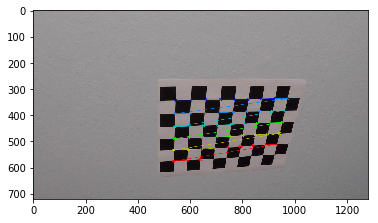

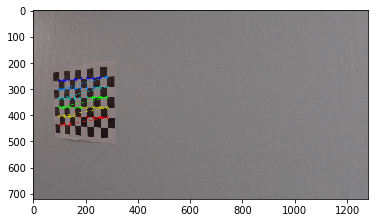

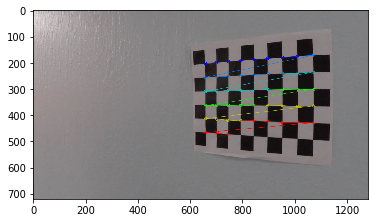

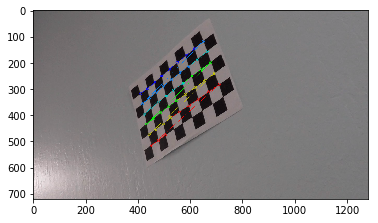

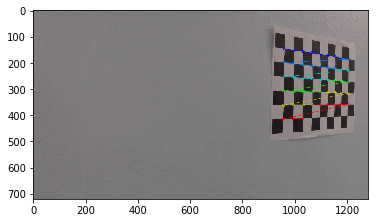

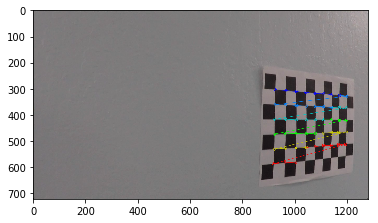

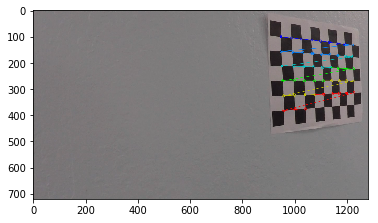

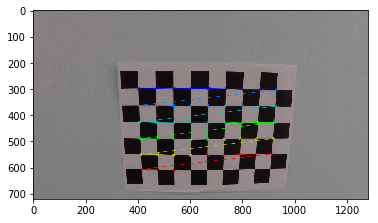

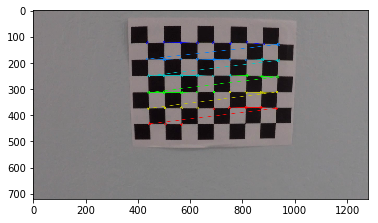

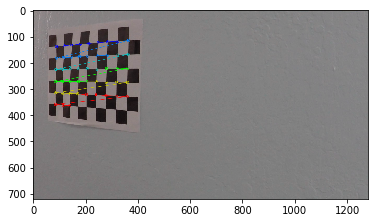

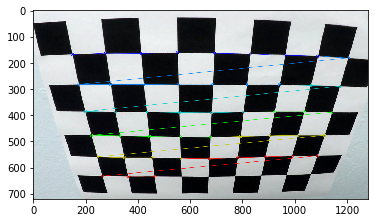

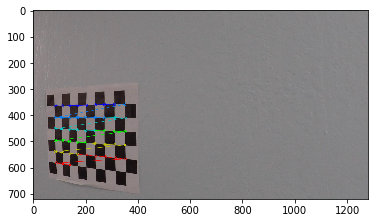

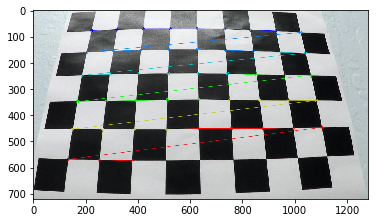

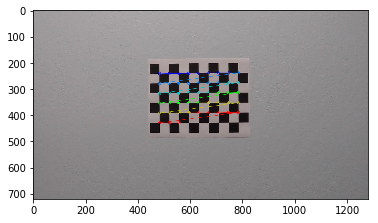

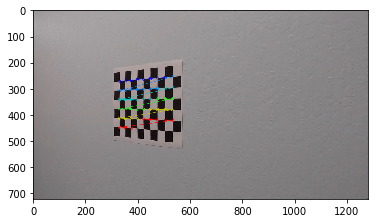

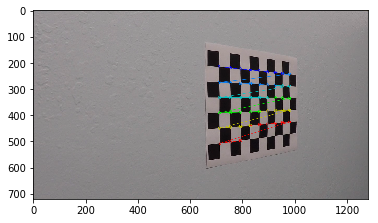

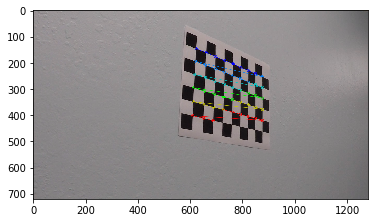

In [4]:
# Using the images from camera_cal to create a list of object points and image points

import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    plt.figure()
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (8,6), corners, ret)
        #cv2.imwrite(write_name, img)
        plt.imshow(img)
        

plt.show()

In [7]:
# Calibrating camera using test image

img = cv2.imread('camera_cal/calibration1.jpg')

img_size = (img.shape[1], img.shape[0]) # getting the shape of input images[1], since the shapes are consistent

# Calibrate and obtain the camera matrix , distortion matrix, rotational and translational vectors
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

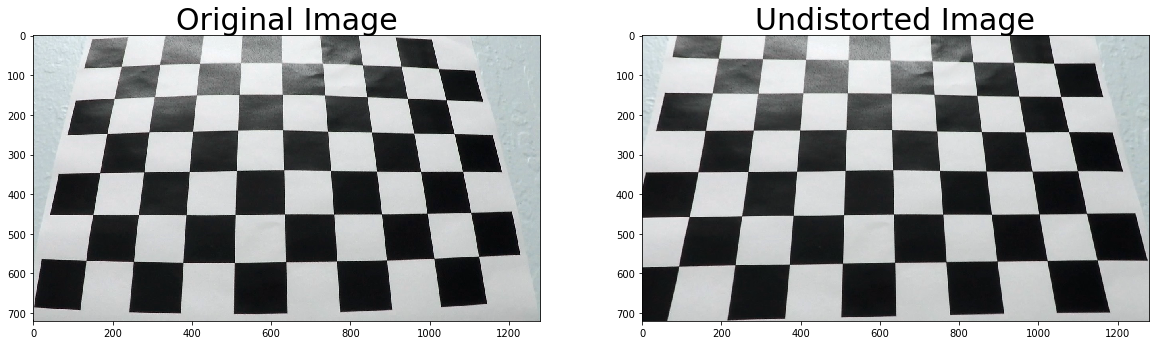

In [25]:
# Test undistortion on a single image
img = cv2.imread('camera_cal/calibration3.jpg')
dst = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [30]:
# Test Undistortion on all the images that were used for calibration

import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

IMG_DST = os.path.join("camera_cal_corrected")

# Make a list of calibration images
for idx,image in  enumerate(glob.glob('camera_cal/calibration*.jpg')):
    img = mpimg.imread(image)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    print(os.path.join(IMG_DST,"calib_correct_{0}.jpg".format(idx)))
    cv2.imwrite(os.path.join(IMG_DST,"calib_correct_{0}.jpg".format(idx)), dst) 




camera_cal_corrected/calib_correct_0.jpg
camera_cal_corrected/calib_correct_1.jpg
camera_cal_corrected/calib_correct_2.jpg
camera_cal_corrected/calib_correct_3.jpg
camera_cal_corrected/calib_correct_4.jpg
camera_cal_corrected/calib_correct_5.jpg
camera_cal_corrected/calib_correct_6.jpg
camera_cal_corrected/calib_correct_7.jpg
camera_cal_corrected/calib_correct_8.jpg
camera_cal_corrected/calib_correct_9.jpg
camera_cal_corrected/calib_correct_10.jpg
camera_cal_corrected/calib_correct_11.jpg
camera_cal_corrected/calib_correct_12.jpg
camera_cal_corrected/calib_correct_13.jpg
camera_cal_corrected/calib_correct_14.jpg
camera_cal_corrected/calib_correct_15.jpg
camera_cal_corrected/calib_correct_16.jpg
camera_cal_corrected/calib_correct_17.jpg
camera_cal_corrected/calib_correct_18.jpg
camera_cal_corrected/calib_correct_19.jpg


## Step 2

### Undistorting the images based on the calibration step

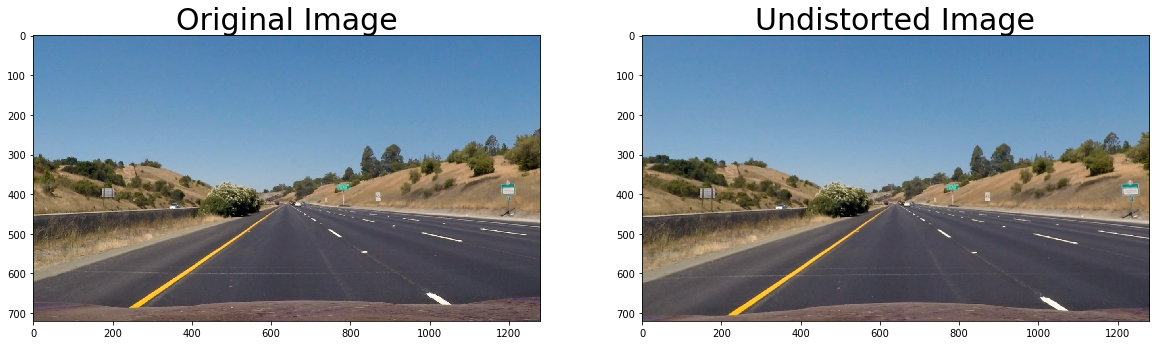

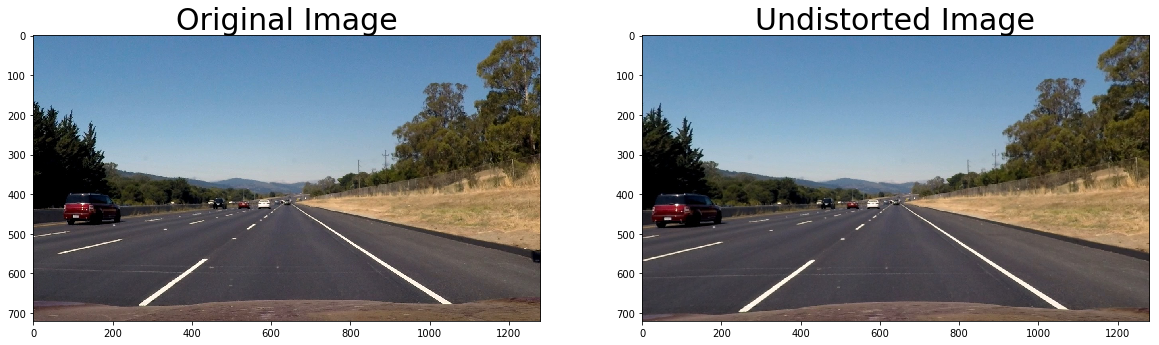

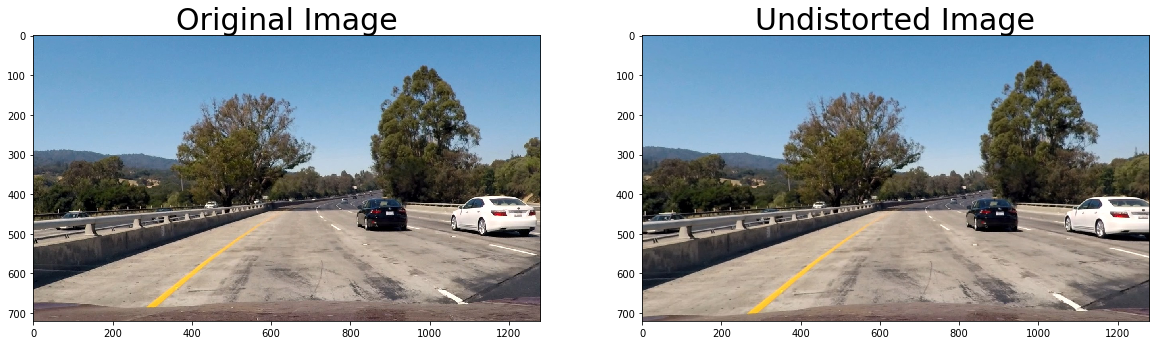

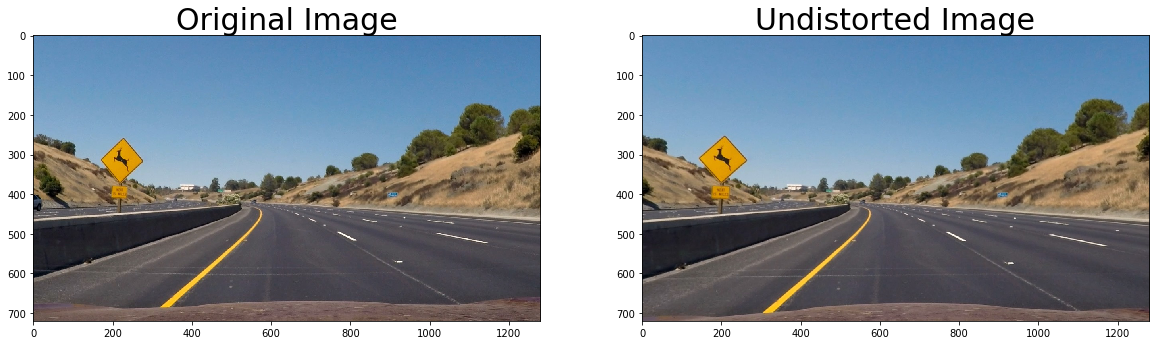

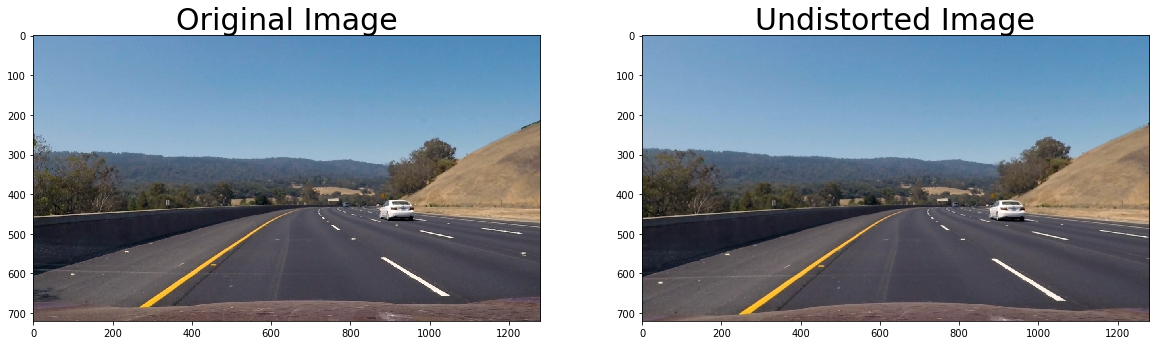

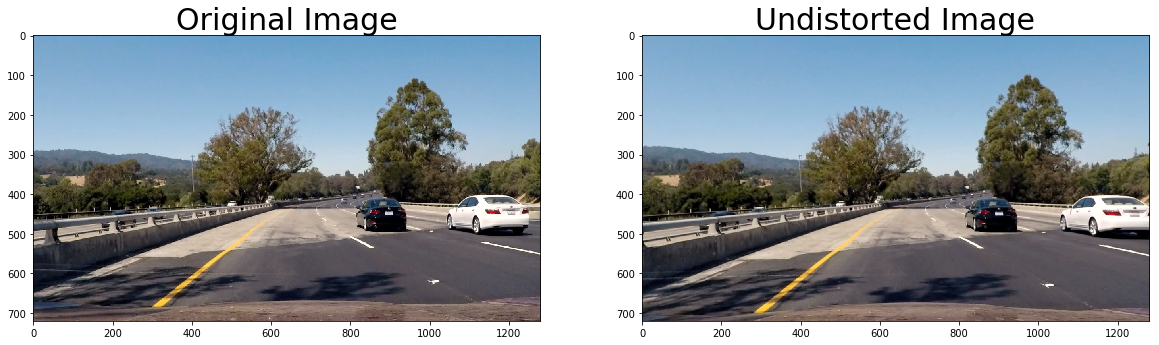

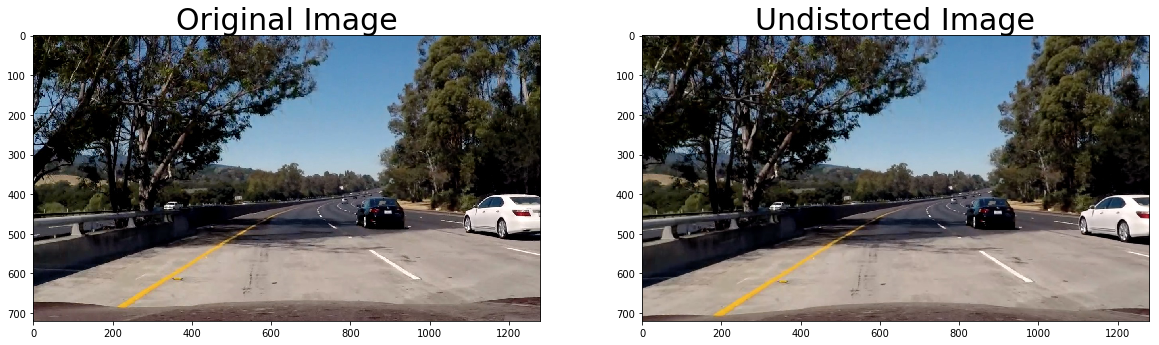

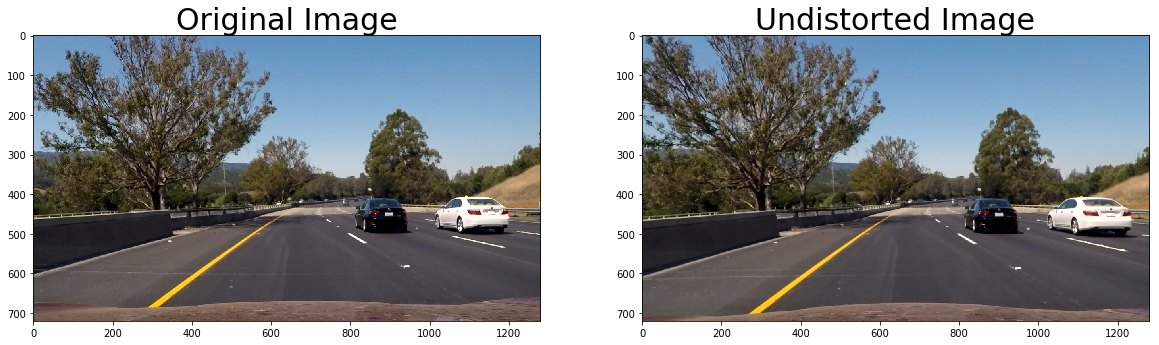

In [33]:
# Applying the undistortion on the test images

IMG_SRC = os.path.join("test_images")

# Make a list of calibration images
for image in  glob.glob(os.path.join(IMG_SRC,'*.jpg')):
    img = mpimg.imread(image)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(img)
    ax1.set_title('Original Image', fontsize=30)
    ax2.imshow(dst)
    ax2.set_title('Undistorted Image', fontsize=30)


## Step 3

### Color and Gradiant Thresholding

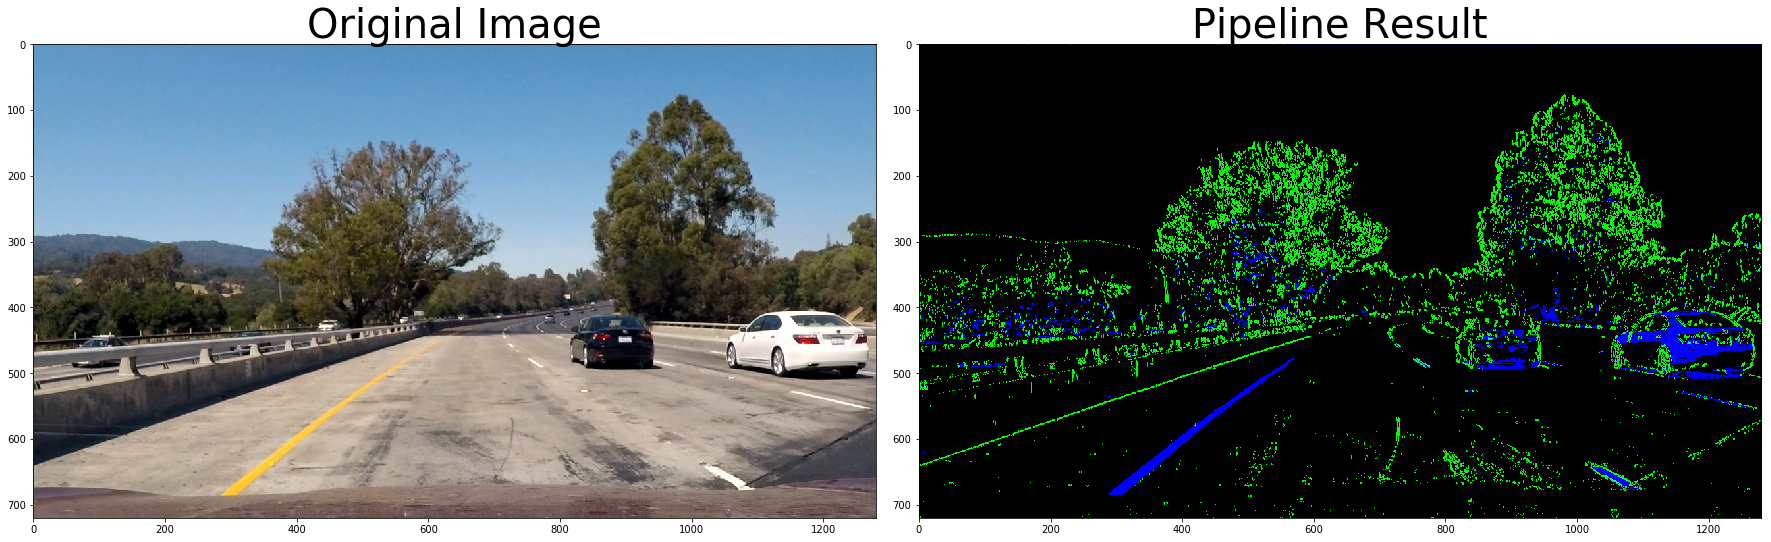

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image = mpimg.imread('test_images/test1.jpg')

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100)):
    img = np.copy(img)
    # Convert to HSV color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    # Note color_binary[:, :, 0] is all 0s, effectively an all black image. It might
    # be beneficial to replace this channel with something else.
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary))
    return color_binary
    
result = pipeline(image)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result)
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)